#**NYC Airbnb Data Analysis Project**

**Welcome to the NYC Airbnb Data Analysis Project! 🏙️✨!**
About the project:

- Data cleaning 🧹
- Exploring relationships 🔍
- Answering key questions ❓
- Visualizing your findings 📊

This is a fully interactive project designed to show my data analysis skills and put into practice what I’ve learned in my Python for Data Analytics course! 🚀





We are working with **the New York City Airbnb** dataset, which includes details about Airbnb listings across New York. The dataset contains valuable information such as neighborhood, price, room type, and availability of the listings.

To better understand the dataset, I highly recommend checking the full description and metadata on [Kaggle](https://www.kaggle.com/datasets/vrindakallu/new-york-dataset). There you will find more details about the data, including the meaning of each column and how the dataset was collected.


Let's import the necessary libraries and load the dataset!

In [ ]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("vrindakallu/new-york-dataset")
df = pd.read_csv(f'{path}/new_york_listings_2024.csv')


Once the dataset is loaded, you can explore its structure, columns, and some sample records.

💡 **Hands-On Tip:**
Make sure to explore the columns and rows to familiarize yourself with the data you're working with. Understanding the structure is essential for any data analysis task!


**EDA**

In [ ]:
# Display the first 5 rows of the DataFrame
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [ ]:
# Get a summary of the DataFrame (columns, data types, and missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [ ]:
# Check basic statistics for numerical columns
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In any data analysis project, it's essential to ensure that the data is clean before diving into analysis. Typically, this involves handling missing values, checking for duplicates, and ensuring that the data types are correct. However, after performing these checks, we can conclude that our dataset is already well-prepared for analysis.

**Key Data Cleaning Steps to Consider:**

1.   **Missing Values**: Usually, we would handle missing values by either filling or removing them.
2. **Duplicate Rows**: It's important to check for duplicates to avoid redundant data that can skew analysis.
3. **Data Types**: Another important step is to ensure that columns have the correct data types. We inspected the data types and found everything to be in order. If needed, we could have adjusted the types of some columns (e.g., converting numerical columns or date formats).


#### **cleaning data**

In [ ]:
# Checking for missing values
missing_data = df.isnull().sum()
print("Missing values:\n", missing_data)


Missing values:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64


In [ ]:
# Checking for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [ ]:
# Example of data type conversion (not needed here but typically useful)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


After performing these checks, we found that the dataset is already clean and ready for analysis. This means no further data cleaning steps are necessary for now, so we can proceed directly to Exploratory Data Analysis (EDA). 🎉


In [ ]:
# Describing only the relevant columns
relevant_columns = ['price', 'minimum_nights', 'number_of_reviews',
                    'reviews_per_month', 'calculated_host_listings_count',
                    'availability_365', 'bedrooms', 'beds', 'baths', 'rating']

df[relevant_columns].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,beds
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,1.723721
std,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,1.212272
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,1.000000
25%,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000
50%,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,1.000000
75%,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,2.000000
max,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,42.000000



Now let's dive into the results of the `describe()` function and the metrics we have in front of us, to gain a better understanding of the characteristics of this dataset:

 **Price**:
- The average price of an Airbnb listing in New York City is around **\$188** per night.
- However, there’s a **wide variation** in prices, with some listings costing as low as **\$10** and some reaching extreme outliers of **\$100,000** (likely luxury or unique properties).
- The high standard deviation (**\$1022.80**) indicates that while most listings are in the lower range, a few **very high-priced listings** skew the data.

**Minimum Nights**:
- On average, hosts require a minimum stay of around **28 nights**, which is relatively high. This suggests that some listings are targeting **longer-term stays**.
- While some listings allow **1-night stays**, others require a minimum stay of **1250 nights**, indicating long-term rental options for certain properties.

**Number of Reviews**:
- The average listing has received around **43 reviews**. However, this varies significantly, with some listings having only **1 review**, while others have up to **1865 reviews**, reflecting the popularity and frequency of bookings.


 **Reviews Per Month**:
- On average, listings receive **1.26 reviews per month**, which suggests consistent booking activity.
- Some listings receive as many as **75 reviews per month**, indicating extremely high turnover and popularity.


**Host Listings**:
- On average, hosts manage **18.8 listings**, which suggests that many hosts on the platform are **professional property managers**.
- Some hosts manage only **1 listing**, typical of individual hosts, while the most active hosts manage up to **713 listings**, likely indicating commercial hosts.

**Availability (365 Days)**:
- Listings are available for an average of **206 days per year**, meaning many listings are booked or unavailable for a portion of the year.
- Some listings are available for **365 days** a year, while others are fully booked (or unavailable) for the entire year.

**Beds**:
- The average listing offers **1.72 beds**, indicating that many properties are small, likely **1-bedroom apartments or studios**. The maximum number of beds in a listing is **42**, suggesting that there are some large, group-oriented properties.


Now let's walk through some focused visualizations based on the most relevant columns

##  **visualizing data**

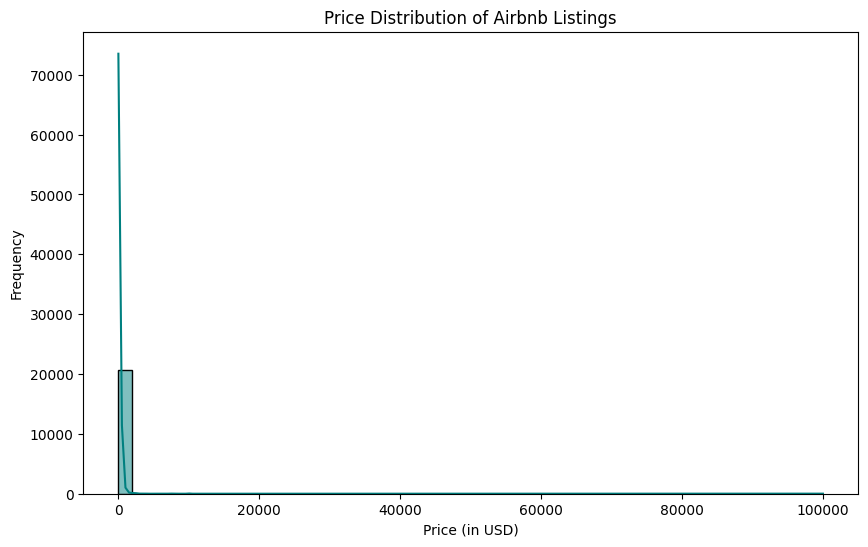

In [ ]:
# Price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color='teal')
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price (in USD)')
plt.ylabel('Frequency')
plt.show()


In this plot, we attempted to visualize the full distribution of Airbnb listing prices. However, we can see that the vast majority of prices are clustered near $0, while the x-axis extends all the way up to \$100,000. This is because there are some extremely high-priced listings (outliers) that skew the distribution and compress the visual representation of most listings. As a result, the bulk of listings, which are priced much lower, are squeezed into a very narrow section of the plot, making it difficult to see meaningful trends.

To solve this, we will apply a price cap and only consider listings with prices up to \$1000 to get a clearer view of the price distribution for the majority of listings.



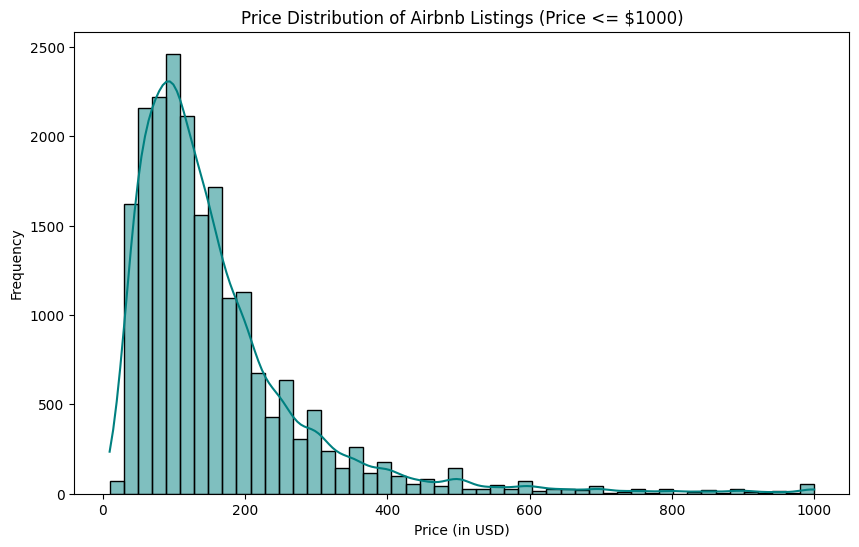

In [ ]:
# Apply a cap to prices to remove extreme outliers
filtered_df = df[df['price'] <= 1000]

plt.figure(figsize=(10,6))
sns.histplot(filtered_df['price'], bins=50, kde=True, color='teal')
plt.title('Price Distribution of Airbnb Listings (Price <= $1000)')
plt.xlabel('Price (in USD)')
plt.ylabel('Frequency')
plt.show()


In this second plot, we restricted the dataset to only include listings priced at \$1000 or below, which represents the vast majority of listings. As a result, we can now see a more detailed distribution:

Most listings fall within the \$50 to \$300 range, with a peak around \$150 per night.
The distribution is right-skewed, meaning that while there are many affordable listings, a small number of higher-priced listings are still present.
This plot gives a much clearer view of the typical prices for Airbnb listings in New York City, without the distortion caused by a few extreme outliers.


Now that we've completed our exploratory data analysis (EDA), it's time to dive deeper into specific visualizations and key analytical questions. You'll answer key questions about the Airbnb data, step by step, with explanations and hands-on tasks.


Before we dive into deeper analysis, remember that during EDA, we encountered an issue with outliers. Outliers are extreme values (in this case, extremely high prices) that can skew visualizations and make it difficult to see the true patterns where most data points fall.

In our case, the presence of a few very expensive listings (outliers) distorted our price distribution visualizations, making it hard to analyze the more typical price range for most Airbnb listings.


**Why Explore Price Distribution?**

💡 To solve this, we need to take a step back and carefully explore how prices are distributed across all listings. This will help us:

1. Understand the range of prices in the dataset.
2. Identify the majority of listings that fall into reasonable price ranges.
3. Find a way to group prices into meaningful categories that will help us visualize the data more clearly.

To do this, we’ll group prices into bins that grow exponentially. This means we will have price ranges like **0-10,000, 10,000-20,000**, and so on. This approach helps handle the wide variation in prices by capturing listings in **small bins for low prices** (where most listings are) and **larger bins** for high prices (where only a few listings exist).

👉 Let’s start by visualizing the distribution of prices using exponentially increasing bins. This will help you see where most Airbnb listings fall and identify whether there are significant numbers of listings with extremely high prices.

####**The distribution of price**

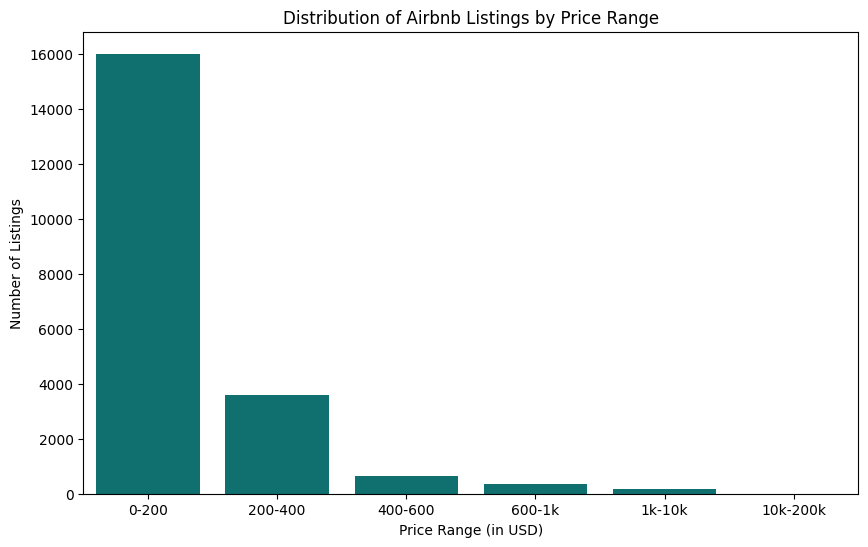

In [ ]:
# Define price bins (exponentially increasing)
bins = [0, 200, 400, 600, 1000, 10000,200000]

# Create labels for the bins
bin_labels = ['0-200', '200-400', '400-600', '600-1k', '1k-10k','10k-200k']

# Assign each listing to a bin
df['price_bin'] = pd.cut(df['price'], bins=bins, labels=bin_labels, include_lowest=True)

# Plot the distribution of listings in each price bin
plt.figure(figsize=(10,6))
sns.countplot(x='price_bin', data=df, color='teal')
plt.title('Distribution of Airbnb Listings by Price Range')
plt.xlabel('Price Range (in USD)')
plt.ylabel('Number of Listings')
plt.show()





Here’s an updated version of your conclusion based on the new image:

We can notice that the majority of Airbnb listings fall within the **\$0-200**  price range, with a significant portion of listings also priced between **\$200-400**. There are fewer listings in the **\$400-600**  range, and the number of listings dramatically decreases beyond **\$600** .

Only a small number of listings are priced above **\$1,000** , and extremely high-priced listings (e.g., above **\$10,000** ) represent a very small fraction of the data. These outliers can distort visualizations and make it difficult to focus on the majority of listings, which are priced at more typical levels.

To improve clarity in our analysis moving forward, we will address these outliers by applying a price cap and filter on our data, allowing us to focus on the majority of Airbnb listings.


In [ ]:
filtered_df = df[df['price'] <= 10000]

💡 **Objective:** Understand how prices vary between different room types. Do certain room types tend to be more expensive than others?

👉 **Task:** Let's now visualize the price distribution across room types. This will give us an overview of how prices differ for room types like "Entire home/apt," "Private room," and "Shared room."


####**Price Distribution by Room Type**

/tmp/ipython-input-14-247870603.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price_bin'] = pd.cut(filtered_df['price'], bins=bins, labels=bin_labels, include_lowest=True)


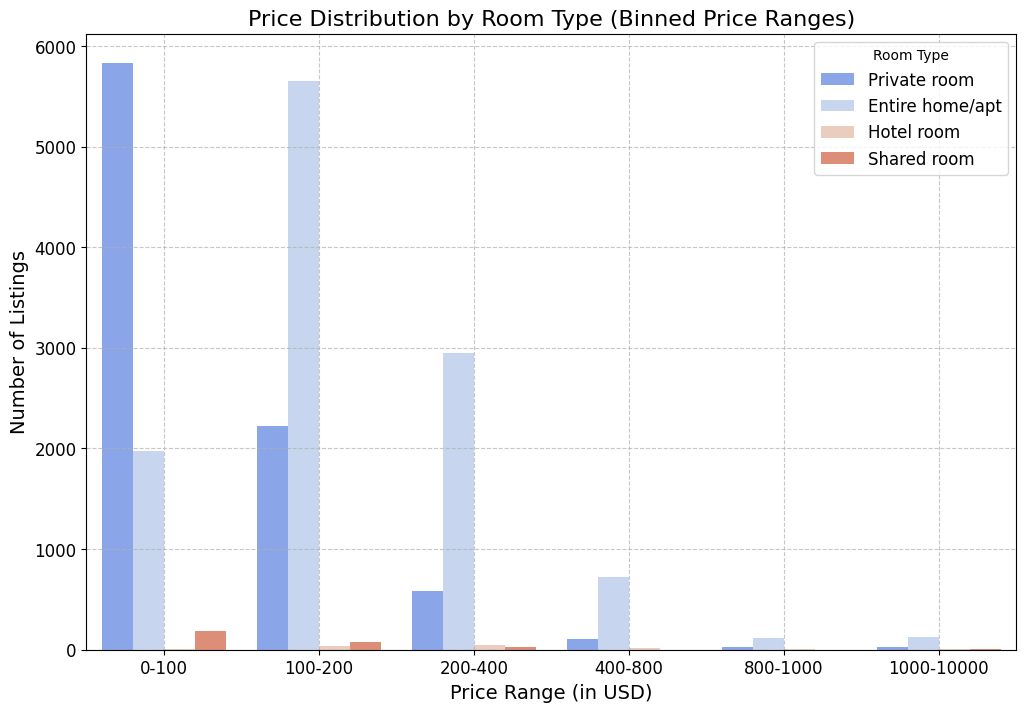

In [ ]:
# Define price bins
bins = [0, 100, 200, 400, 800, 1000,10000]
bin_labels = ['0-100', '100-200', '200-400', '400-800', '800-1000','1000-10000']

# Add a new column for binned prices
filtered_df['price_bin'] = pd.cut(filtered_df['price'], bins=bins, labels=bin_labels, include_lowest=True)

# Create a binned bar plot for price distribution by room type
plt.figure(figsize=(12,8))
sns.countplot(x='price_bin', hue='room_type', data=filtered_df, palette='coolwarm')

# Add a title and axis labels
plt.title('Price Distribution by Room Type (Binned Price Ranges)', fontsize=16)
plt.xlabel('Price Range (in USD)', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Room Type', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


The majority of Airbnb listings are concentrated in the lower price ranges, particularly for **private rooms** and **entire homes/appartments**. This reinforces the notion that Airbnb is largely a platform for more affordable, short-term stays. As prices increase, the number of listings decreases significantly, with only a few high-end listings surpassing **$1000 USD**.

💡 Objective: Do more expensive Airbnb listings receive more reviews? Let’s explore the relationship between the price of a listing and the number of reviews.**bold text**

👉 Task: Create a scatter plot to visualize the relationship between price and number of reviews, still using the price cap of $10,000 to avoid the influence of extreme outliers.

####**Relationship Between Price and Number of Reviews**

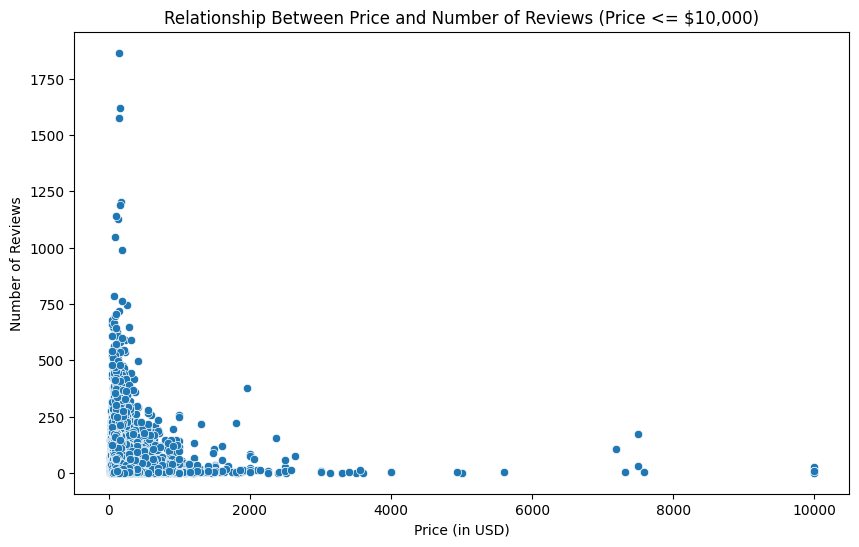

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='number_of_reviews', data=filtered_df)
plt.title('Relationship Between Price and Number of Reviews (Price <= $10,000)')
plt.xlabel('Price (in USD)')
plt.ylabel('Number of Reviews')
plt.show()



The scatter plot shows that:

- **Lower-priced listings** (below $1,000 USD) tend to have more reviews, with many reaching over 500 reviews. This suggests that affordable listings are booked more often, leading to more reviews.

- **Higher-priced listings** (above $2,000 USD) generally have fewer reviews, indicating that luxury or high-cost properties are booked less frequently, possibly catering to a more selective audience.

Which means : There is an **inverse relationship** between **price** and the number of **reviews**: cheaper listings get more reviews, while expensive listings tend to have fewer.



💡 **Objective:** Find out which neighborhood groups have the highest average listing prices.

👉 Task: Use a bar plot to compare the average prices of Airbnb listings across different neighborhood groups. We'll keep the price cap applied to focus on the majority of listings.

####**Average Price of Listings by Neighbourhood Group**

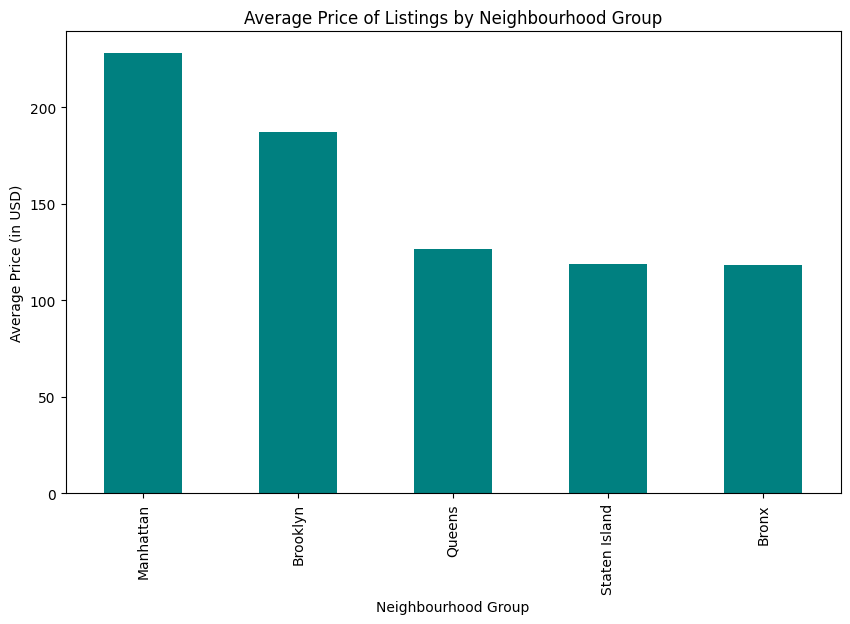

In [ ]:
# Task: Bar plot for average price per neighborhood group (with price cap)
average_price_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_price_neighbourhood.plot(kind='bar', color='teal')
plt.title('Average Price of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price (in USD)')
plt.show()


From the bar plot, we can see how Airbnb prices vary across NYC’s neighborhoods:

- **Manhattan** tops the chart with average prices over $200 USD per night. This makes sense since it’s a prime location with high demand.

- **Brooklyn** comes in next, with listings averaging around $150 USD—a popular, slightly more affordable option compared to Manhattan.

- **Queens**, **Staten Island**, and the **Bronx** offer the most budget-friendly stays, all averaging under $100 USD per night, making them great choices for travelers looking for affordability.



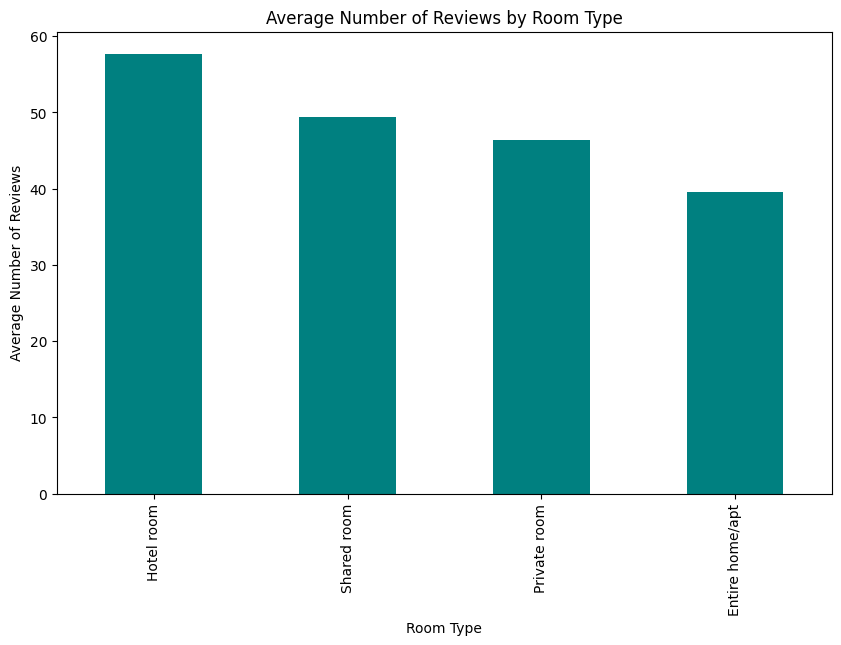

In [ ]:
average_number_of_reviews = df.groupby('room_type')['number_of_reviews'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_number_of_reviews.plot(kind='bar', color = 'teal ')
plt.title('Average Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Reviews')
plt.show()

# "hotel room" has the highist reviews.

<function matplotlib.pyplot.show(close=None, block=None)>

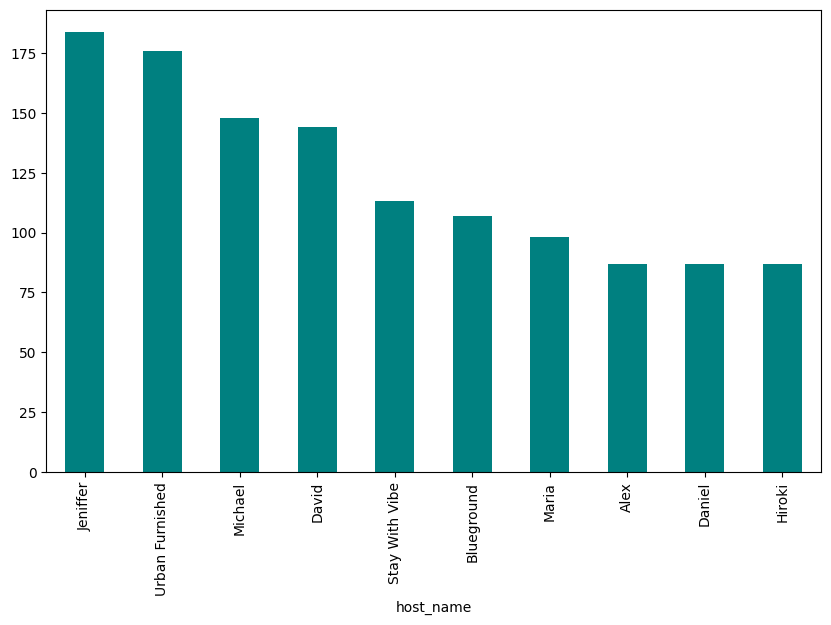

In [ ]:
Highest_host = df.groupby('host_name')['calculated_host_listings_count'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
Highest_host.head(10).plot(kind='bar', color = 'teal')
plt.show

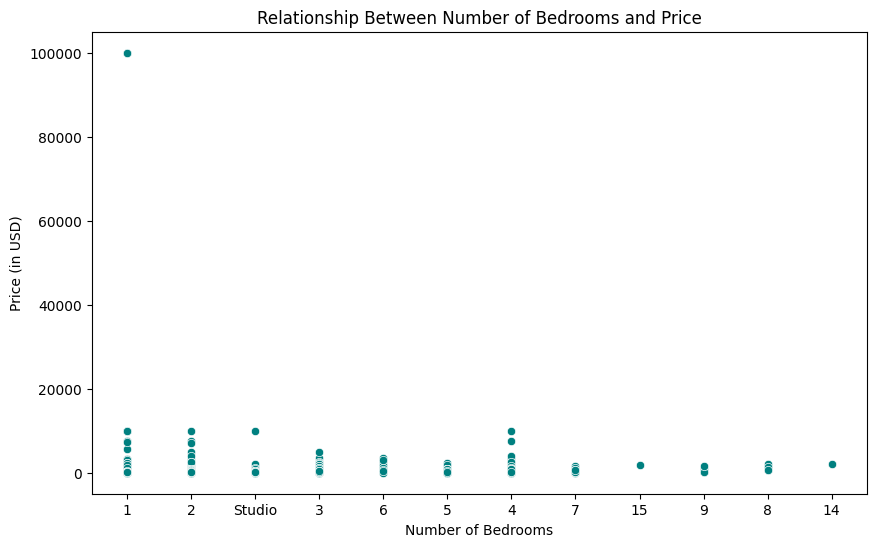

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df, color = 'teal')
plt.title('Relationship Between Number of Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (in USD)')
plt.show()